# Project: Investing In Stocks
---------------------------------------------


#1.Data Preparation and EDA








## 1.1. Extract S&P 500 stocks list

In [ ]:
# Install the Yahoo Finance library to fetch stock market data
!pip install yahoo-fin

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import yahoo_fin.stock_info as si

In [ ]:
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"


tables = pd.read_html(url)
sp500_df = tables[0]

# Display the first few rows
sp500_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## 1.2. Filter S&P 500 Companies by Sector and Date

In the below code we filter S&P 500 companies in the Utilities, Industrials, and Consumer Staples sectors and selects only those that are dated between January 1, 2017 to December 31, 2022.

In [ ]:
#converting the dtype of Date added to date from string
sp500_df['Date added']=pd.to_datetime(sp500_df['Date added'],errors='coerce')

#Creating a list of tickers for industries in Utilities, Industrial and Consumer Staples sectors and ensuring there is no company selected which is datated after jan 1 2017.
utilities_df=sp500_df.loc[(sp500_df['GICS Sector']=='Utilities')&(sp500_df['Date added']<=pd.Timestamp('2017-01-01')),['Symbol','Security','GICS Sub-Industry']]
industrial_df=sp500_df.loc[(sp500_df['GICS Sector']=='Industrials')&(sp500_df['Date added']<=pd.Timestamp('2017-01-01')),['Symbol','Security','GICS Sub-Industry']]
ConsumerStaples_df=sp500_df.loc[(sp500_df['GICS Sector']=='Consumer Staples')&(sp500_df['Date added']<=pd.Timestamp('2017-01-01')),['Symbol','Security','GICS Sub-Industry']]

In [ ]:
# Count the number of companies in each filtered sector
utilities_count = utilities_df.shape[0]
industrial_count = industrial_df.shape[0]
consumer_staples_count = ConsumerStaples_df.shape[0]

# Print the counts
print(f"Number of companies in Utilities sector: {utilities_count}")
print(f"Number of companies in Industrials sector: {industrial_count}")
print(f"Number of companies in Consumer Staples sector: {consumer_staples_count}")

Number of companies in Utilities sector: 25
Number of companies in Industrials sector: 55
Number of companies in Consumer Staples sector: 34


##  1.3.  Top 3 Performing Utilities Stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Top 3 Utilities Stocks by Overall Gain from 2017 to 2022:
   Ticker  Percentage Gain
16    NEE       223.731782
0     AES       201.812230
18    NRG       190.660581


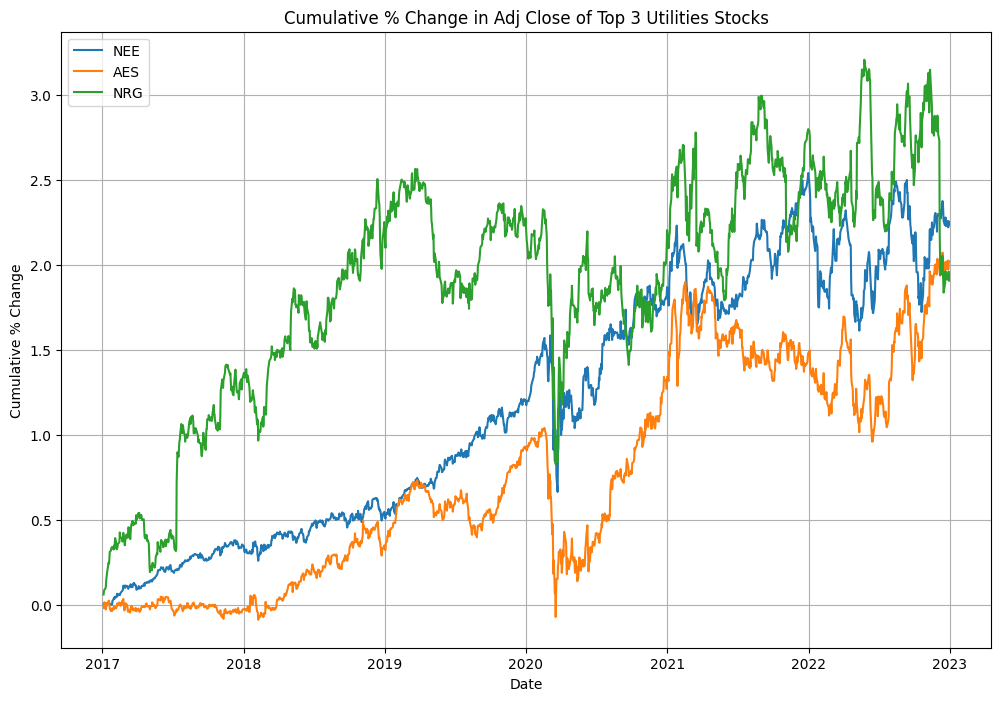

In [ ]:
#   SVN- import yfinance as yf
import pandas as pd

utilities = utilities_df['Symbol'].unique().tolist()

# Dictionary to store data and percentage gain for each ticker
utilities_data = {}
utilities_gain = {}

for ticker in utilities:
    # Download the stock data
    data = yf.download(ticker, start='2017-01-01', end='2022-12-31', interval='1d')
    data.dropna(inplace=True)  # Drop rows with missing values

    # Ensure the DataFrame is not empty before accessing start and end prices
    if not data.empty:
        start_price = data["Adj Close"].iloc[0]  # First closing price in the date range
        end_price = data["Adj Close"].iloc[-1]   # Last closing price in the date range
        percentage_change = ((end_price - start_price) / start_price) * 100
        utilities_gain[ticker] = percentage_change  # Store in the dictionary

        # Store the data only if it's non-empty and valid
        utilities_data[ticker] = data
    else:
        print(f"No data for {ticker} in the specified date range.")

# Convert the utilities_gain dictionary to a DataFrame
utilities_gain_df = pd.DataFrame(list(utilities_gain.items()), columns=['Ticker', 'Percentage Gain'])

# Ensure that 'Percentage Gain' is a float type
utilities_gain_df['Percentage Gain'] = utilities_gain_df['Percentage Gain'].astype(float)

# Get the top 3 utilities stocks by percentage gain
top_3_utilities = utilities_gain_df.nlargest(3, 'Percentage Gain')
top_3_utilities_tickers = top_3_utilities['Ticker'].tolist()
print("Top 3 Utilities Stocks by Overall Gain from 2017 to 2022:")
print(top_3_utilities)

# prompt: plot a graph for Adj Close for the top_3_utilities_ticker. But the starting point for them must be zero

# Assuming you have top_3_utilities_tickers defined from the previous code

plt.figure(figsize=(12, 8))

# Loop through the top 3 utilities tickers
for ticker in top_3_utilities_tickers:
    data = utilities_data[ticker]

    # Calculate daily percentage change in Adj Close
    daily_pct_change = data['Adj Close'].pct_change()

    # Calculate cumulative percentage change
    cumulative_pct_change = (1 + daily_pct_change).cumprod() - 1  # Convert to cumulative returns

    # Plot cumulative percentage change
    plt.plot(data.index, cumulative_pct_change, label=ticker)

# Adding labels, title, legend, and grid to the plot
plt.xlabel('Date')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Adj Close of Top 3 Utilities Stocks')
plt.legend()
plt.grid(True)
plt.show()



*Key Insights*:
*   NEE (NextEra Energy) shows the highest percentage gain (223.73%), indicating steady long-term growth.
*   AES and NRG also show strong performance (201.81% and 190.66%, respectively), though with slightly higher volatility compared to NEE.
*   All three stocks demonstrate resilience, with notable growth even during volatile periods (e.g., early 2020 pandemic downturn).

*Implications*:
*   Utilities stocks like NEE could serve as stabilizers in a portfolio due to their steady returns and lower risk profiles.
*   NRG and AES might introduce slightly more risk due to their volatility but offer attractive growth potential, suitable for medium-risk portfolios.









##  1.4.  Top 3 Performing Consumer Staples Stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2017-01-01 -> 2022-12-31)')


No data for BF.B in the specified date range.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Top 3 Consumer Staples Stocks by Overall Gain from 2017 to 2022:
   Ticker  Percentage Gain
10     DG       251.851209
12     EL       240.202008
9    COST       222.284300


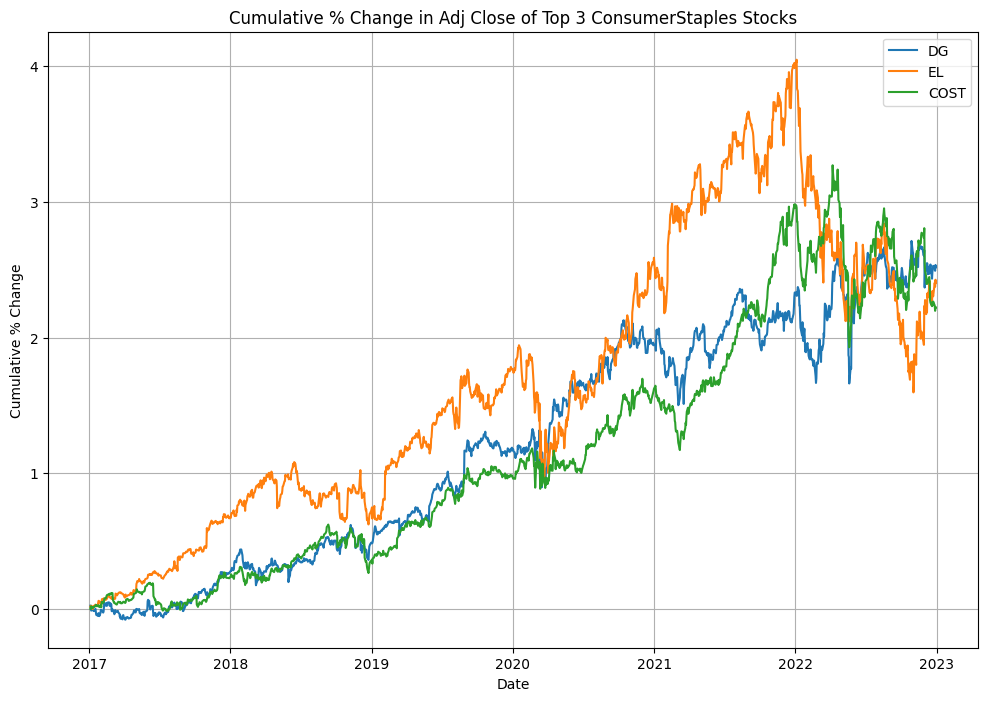

In [ ]:
import yfinance as yf
import pandas as pd

ConsumerStaples = ConsumerStaples_df['Symbol'].unique().tolist()

# Dictionary to store data and percentage gain for each ticker
ConsumerStaples_data = {}
ConsumerStaples_gain = {}

for ticker in ConsumerStaples:
    # Download the stock data
    data = yf.download(ticker, start='2017-01-01', end='2022-12-31', interval='1d')
    data.dropna(inplace=True)  # Drop rows with missing values

    # Ensure the DataFrame is not empty before accessing start and end prices
    if not data.empty:
        start_price = data["Adj Close"].iloc[0]  # First closing price in the date range
        end_price = data["Adj Close"].iloc[-1]   # Last closing price in the date range
        percentage_change = ((end_price - start_price) / start_price) * 100
        ConsumerStaples_gain[ticker] = percentage_change  # Store in the dictionary

        # Store the data only if it's non-empty and valid
        ConsumerStaples_data[ticker] = data
    else:
        print(f"No data for {ticker} in the specified date range.")

# Convert the ConsumerStaples_gain dictionary to a DataFrame
ConsumerStaples_gain_df = pd.DataFrame(list(ConsumerStaples_gain.items()), columns=['Ticker', 'Percentage Gain'])

# Ensure that 'Percentage Gain' is a float type
ConsumerStaples_gain_df['Percentage Gain'] = ConsumerStaples_gain_df['Percentage Gain'].astype(float)

# Get the top 3 ConsumerStaples stocks by percentage gain
top_3_ConsumerStaples = ConsumerStaples_gain_df.nlargest(3, 'Percentage Gain')
top_3_ConsumerStaples_tickers = top_3_ConsumerStaples['Ticker'].tolist()
print("Top 3 Consumer Staples Stocks by Overall Gain from 2017 to 2022:")
print(top_3_ConsumerStaples)

plt.figure(figsize=(12, 8))

# Loop through the top 3 ConsumerStaples tickers
for ticker in top_3_ConsumerStaples_tickers:
    data = ConsumerStaples_data[ticker]

    # Calculate daily percentage change in Adj Close
    daily_pct_change = data['Adj Close'].pct_change()

    # Calculate cumulative percentage change
    cumulative_pct_change = (1 + daily_pct_change).cumprod() - 1  # Convert to cumulative returns

    # Plot cumulative percentage change
    plt.plot(data.index, cumulative_pct_change, label=ticker)

# Adding labels, title, legend, and grid to the plot
plt.xlabel('Date')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Adj Close of Top 3 ConsumerStaples Stocks')
plt.legend()
plt.grid(True)
plt.show()


*Key Insights*:
*   DG (Dollar General) exhibits the highest gain (251.85%), followed by EL (Estée Lauder) and COST (Costco) with gains of 240.20% and 222.28%, respectively.
*  These stocks show strong upward trends with fewer downturns, reflecting the stability of the Consumer Staples sector.
*   COST and DG show exceptional performance during recessionary periods, likely due to increased demand for consumer staples.

*Implications*:
*   These stocks are ideal candidates for risk-averse portfolios, providing stability and consistent growth.
*   Including DG and COST in a portfolio can hedge against economic downturns, while EL adds moderate growth potential with slightly higher risk.

##  1.5.  Top 3 Performing Industrial Stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Top 3 Industrial Stocks by Overall Gain from 2017 to 2022:
   Ticker  Percentage Gain
10     DE       353.805042
7    CTAS       345.618491
37    PWR       314.396020



<ipython-input-41-87ee9a055a15>:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  industrial_gain_df['Percentage Gain'] = industrial_gain_df['Percentage Gain'].astype(float)


<Figure size 1200x600 with 0 Axes>

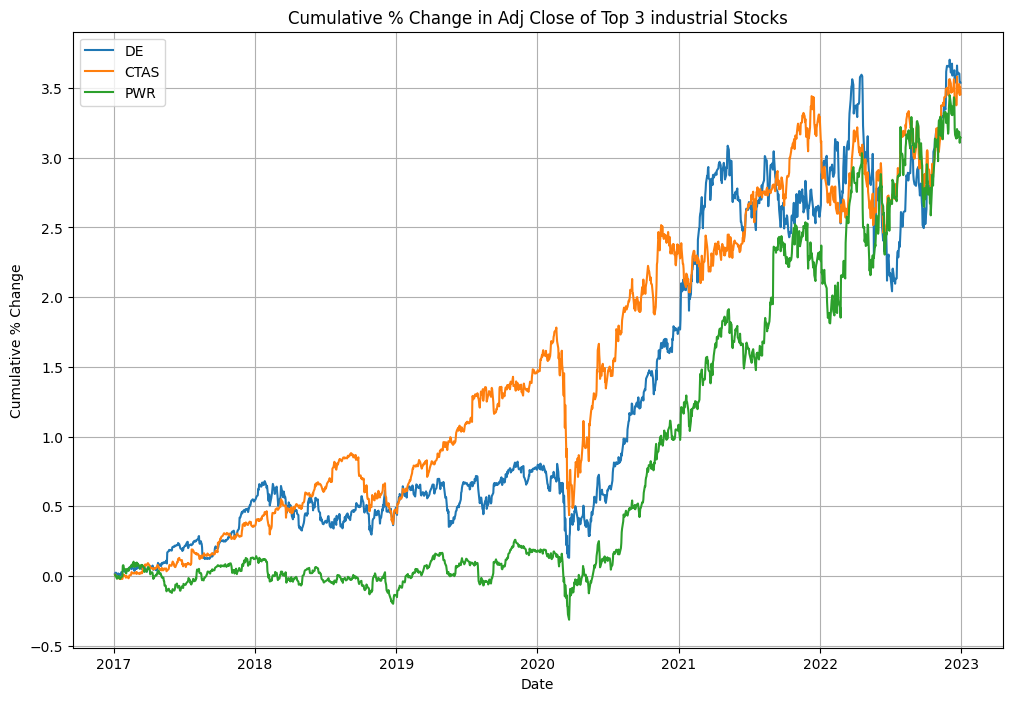

In [ ]:
import yfinance as yf
import pandas as pd

industrial = industrial_df['Symbol'].unique().tolist()

# Dictionary to store data and percentage gain for each ticker
industrial_data = {}
industrial_gain = {}

for ticker in industrial:
    # Download the stock data
    data = yf.download(ticker, start='2017-01-01', end='2022-12-31', interval='1d')
    data.dropna(inplace=True)  # Drop rows with missing values

    # Ensure the DataFrame is not empty before accessing start and end prices
    if not data.empty:
        start_price = data["Adj Close"].iloc[0]  # First closing price in the date range
        end_price = data["Adj Close"].iloc[-1]   # Last closing price in the date range
        percentage_change = ((end_price - start_price) / start_price) * 100
        industrial_gain[ticker] = percentage_change  # Store in the dictionary

        # Store the data only if it's non-empty and valid
        industrial_data[ticker] = data
    else:
        print(f"No data for {ticker} in the specified date range.")

# Convert the industrial_gain dictionary to a DataFrame
industrial_gain_df = pd.DataFrame(list(industrial_gain.items()), columns=['Ticker', 'Percentage Gain'])

# Ensure that 'Percentage Gain' is a float type
industrial_gain_df['Percentage Gain'] = industrial_gain_df['Percentage Gain'].astype(float)

# Get the top 3 industrial stocks by percentage gain
top_3_industrial = industrial_gain_df.nlargest(3, 'Percentage Gain')
top_3_industrial_tickers = top_3_industrial['Ticker'].tolist()
print("Top 3 Industrial Stocks by Overall Gain from 2017 to 2022:")
print(top_3_industrial)

plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 8))

# Loop through the top 3 industrial tickers
for ticker in top_3_industrial_tickers:
    data = industrial_data[ticker]

    # Calculate daily percentage change in Adj Close
    daily_pct_change = data['Adj Close'].pct_change()

    # Calculate cumulative percentage change
    cumulative_pct_change = (1 + daily_pct_change).cumprod() - 1  # Convert to cumulative returns

    # Plot cumulative percentage change
    plt.plot(data.index, cumulative_pct_change, label=ticker)

# Adding labels, title, legend, and grid to the plot
plt.xlabel('Date')
plt.ylabel('Cumulative % Change')
plt.title('Cumulative % Change in Adj Close of Top 3 industrial Stocks')
plt.legend()
plt.grid(True)
plt.show()


*Key Insights*:
*   CTAS (Cintas) leads with a gain of 374.70%, followed closely by DE (John Deere, 353.80%) and PWR (Quanta Services, 314.40%).
*  Industrials demonstrate higher volatility compared to other sectors, with sharp fluctuations in price over time.
*   CTAS and DE exhibit strong long-term growth but are sensitive to market cycles, while PWR shows resilience during specific periods.

*Implications*:
*   Industrial stocks like CTAS and DE are suitable for high-risk, high-return portfolios, particularly for investors targeting long-term capital appreciation.
*  Including a stock like PWR can diversify industrial exposure, balancing out risk due to its relatively stable growth trajectory.

# Quality Check on data and early assessments

In [ ]:
#Merging dataframes for top 3 companies in each sector and S&P 500 to understadn more about companies.
df1=pd.merge(top_3_utilities,utilities_df,left_on='Ticker',right_on='Symbol',how='left').drop('Symbol',axis=1)
df2=pd.merge(top_3_ConsumerStaples,ConsumerStaples_df,left_on='Ticker',right_on='Symbol',how='left').drop('Symbol',axis=1)
df3=pd.merge(top_3_industrial,industrial_df,left_on='Ticker',right_on='Symbol',how='left').drop('Symbol',axis=1)

# Concatenating the three sector-specific dataframes into a single dataframe
final_df = pd.concat([df1, df2, df3], axis=0)

# Displaying the combined dataframe to understand the top-performing companies across sectors
final_df

,Ticker,Percentage Gain,Security,GICS Sub-Industry
0,NEE,223.731782,NextEra Energy,Multi-Utilities
1,AES,201.812230,AES Corporation,Independent Power Producers & Energy Traders
2,NRG,190.660581,NRG Energy,Independent Power Producers & Energy Traders
0,DG,251.851209,Dollar General,Consumer Staples Merchandise Retail
1,EL,240.202008,Estée Lauder Companies (The),Personal Care Products
2,COST,222.284300,Costco,Consumer Staples Merchandise Retail
0,DE,353.805042,Deere & Company,Agricultural & Farm Machinery
1,CTAS,345.618491,Cintas,Diversified Support Services
2,PWR,314.396020,Quanta Services,Construction & Engineering


Early assessment
- To gain max return, one needs to invest fully into Industrial Stocks, ignoring the risk.
- As the risk level increases, proportion of DE or CTAS stock may increase.
- Consumer STabples can act as stabilising stocks as they have shown relatively stables growth.

In [ ]:
# Extracting the list of tickers from the final merged dataframe for further analysis
final_tickers=final_df['Ticker'].tolist()
final_tickers

['NEE', 'AES', 'NRG', 'DG', 'EL', 'COST', 'DE', 'CTAS', 'PWR']

In [ ]:
# Iterating through the first three tickers from the utilities sector to check and print the shape of their data.
# This ensures that the data for each ticker is available and gives an idea of the size (number of rows and columns) of the dataset.
for ticker in final_tickers[0:3]:
    data = utilities_data[ticker].shape
    print(f"Shape of data for {ticker}: {data}")

Shape of data for NEE: (1510, 6)
Shape of data for AES: (1510, 6)
Shape of data for NRG: (1510, 6)


In [ ]:
# Checking and printing the shape of the data for the next three tickers in the Consumer Staples sector.
# This ensures the dataset for these stocks is intact and ready for further analysis.
for ticker in final_tickers[3:6]:
    data = ConsumerStaples_data[ticker].shape
    print(f"Shape of data for {ticker}: {data}")

Shape of data for DG: (1510, 6)
Shape of data for EL: (1510, 6)
Shape of data for COST: (1510, 6)


In [ ]:
# Checking and printing the shape of the data for the last three tickers in the Industrial sector.
# This ensures the dataset for these stocks is complete and can be utilized for analysis or modeling.
for ticker in final_tickers[6:9]:
    data = industrial_data[ticker].shape
    print(f"Shape of data for {ticker}: {data}")

Shape of data for DE: (1510, 6)
Shape of data for CTAS: (1510, 6)
Shape of data for PWR: (1510, 6)


#2.Optimization Model

In [ ]:
# Initializing an empty dictionary to store the relevant data for each ticker.
data={}

for i in final_tickers:
    # Checking if the ticker belongs to the Utilities sector and extracting the first column of data if true.
  if i in utilities_data:
    data[i]=utilities_data[i].iloc[:,0]
    # Checking if the ticker belongs to the Consumer Staples sector and extracting the first column of data if true.
  elif i in ConsumerStaples_data:
    data[i]=ConsumerStaples_data[i].iloc[:,0]
    # Checking if the ticker belongs to the Industrial sector and extracting the first column of data if true.
  elif i in industrial_data:
    data[i]=industrial_data[i].iloc[:,0]

# Converting the collected data for all tickers into a consolidated DataFrame for further analysis.
final_df=pd.DataFrame(data)

# Displaying the first few rows of the final DataFrame to verify the data integration.
final_df.head()

,NEE,AES,NRG,DG,EL,COST,DE,CTAS,PWR
Date,,,,,,,,,
2017-01-03,24.404079,8.862624,10.262347,67.819366,70.246704,136.656693,92.192055,24.354311,34.293011
2017-01-04,24.476021,8.786615,10.871415,69.510468,71.491226,136.682373,93.760345,24.561588,34.489483
2017-01-05,24.461636,8.672603,11.080002,68.121002,71.400391,139.377319,93.343887,24.345936,34.253719
2017-01-06,24.389692,8.984240,11.146745,67.051468,71.909096,139.308884,94.353966,24.433872,34.283192
2017-01-09,24.328018,8.763812,11.238523,67.398857,71.073357,137.717560,93.202141,24.178431,33.585739


In [ ]:
# Display the structure and summary of the final DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2017-01-03 to 2022-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NEE     1510 non-null   float64
 1   AES     1510 non-null   float64
 2   NRG     1510 non-null   float64
 3   DG      1510 non-null   float64
 4   EL      1510 non-null   float64
 5   COST    1510 non-null   float64
 6   DE      1510 non-null   float64
 7   CTAS    1510 non-null   float64
 8   PWR     1510 non-null   float64
dtypes: float64(9)
memory usage: 118.0 KB


In [ ]:
# Calculate daily percentage change for each stock and remove NaN values
return_df=final_df.pct_change().dropna()
return_df.head()

,NEE,AES,NRG,DG,EL,COST,DE,CTAS,PWR
Date,,,,,,,,,
2017-01-04,0.002948,-0.008576,0.059350,0.024935,0.017716,0.000188,0.017011,0.008511,0.005729
2017-01-05,-0.000588,-0.012976,0.019187,-0.019989,-0.001271,0.019717,-0.004442,-0.008780,-0.006836
2017-01-06,-0.002941,0.035933,0.006024,-0.015701,0.007125,-0.000491,0.010821,0.003612,0.000860
2017-01-09,-0.002529,-0.024535,0.008234,0.005181,-0.011622,-0.011423,-0.012207,-0.010454,-0.020344
2017-01-10,0.001943,-0.017346,0.011136,0.007052,-0.011375,0.004286,-0.002852,-0.006061,0.011114


In [ ]:
# Calculate the average daily return for the stock 'NEE'
return_df['NEE'].mean()

0.0009044731340904791

##  2.1.  Calculating Mean and Standard Deviation

In [ ]:
mean_returns = return_df.mean()  # Calculate the mean (average) daily return for each stock.
std_returns = return_df.std()  # Calculate the standard deviation (risk) of daily returns for each stock.

# Create a DataFrame to store the results
summary_df = pd.DataFrame({'Mean Return': mean_returns, 'Standard Deviation': std_returns})
summary_df

,Mean Return,Standard Deviation
NEE,0.000904,0.015854
AES,0.000966,0.021539
NRG,0.000969,0.022990
DG,0.000971,0.016566
EL,0.001006,0.019733
COST,0.000886,0.014789
DE,0.001207,0.020181
CTAS,0.001169,0.018821
PWR,0.001163,0.021056


In [ ]:
# Access the mean return of the second stock in the summary DataFrame.
summary_df.iloc[1,0]

0.0009662822255297485

##  2.2. Covariance of Selected Stocks

In [ ]:
# Calculate the covariance matrix for the stock returns
cov_matrix = return_df.cov()

# Display the covariance matrix
cov_matrix

,NEE,AES,NRG,DG,EL,COST,DE,CTAS,PWR
NEE,0.000251,0.000176,0.000148,0.000087,0.000123,0.000098,0.000100,0.000137,0.000124
AES,0.000176,0.000464,0.000246,0.000093,0.000174,0.000103,0.000206,0.000215,0.000224
NRG,0.000148,0.000246,0.000529,0.000079,0.000150,0.000083,0.000163,0.000191,0.000179
DG,0.000087,0.000093,0.000079,0.000274,0.000096,0.000133,0.000106,0.000104,0.000094
EL,0.000123,0.000174,0.000150,0.000096,0.000389,0.000129,0.000166,0.000201,0.000189
COST,0.000098,0.000103,0.000083,0.000133,0.000129,0.000219,0.000101,0.000126,0.000111
DE,0.000100,0.000206,0.000163,0.000106,0.000166,0.000101,0.000407,0.000191,0.000252
CTAS,0.000137,0.000215,0.000191,0.000104,0.000201,0.000126,0.000191,0.000354,0.000217
PWR,0.000124,0.000224,0.000179,0.000094,0.000189,0.000111,0.000252,0.000217,0.000443


In [ ]:
# how to choose numerical  min value for cov_matrix
min_cov = cov_matrix.min().min()
min_cov

7.894824847864372e-05

In [ ]:
#The new covariance matrix for stock returns
cor_matrix = return_df.corr()
cor_matrix

,NEE,AES,NRG,DG,EL,COST,DE,CTAS,PWR
NEE,1.000000,0.514562,0.407308,0.332097,0.392619,0.416201,0.313847,0.458667,0.371794
AES,0.514562,1.000000,0.495928,0.261452,0.408579,0.324110,0.474359,0.530646,0.494637
NRG,0.407308,0.495928,1.000000,0.207297,0.330009,0.244595,0.351595,0.441469,0.368861
DG,0.332097,0.261452,0.207297,1.000000,0.294639,0.543347,0.317905,0.332089,0.270179
EL,0.392619,0.408579,0.330009,0.294639,1.000000,0.440342,0.417873,0.539944,0.453696
COST,0.416201,0.324110,0.244595,0.543347,0.440342,1.000000,0.339977,0.451157,0.357577
DE,0.313847,0.474359,0.351595,0.317905,0.417873,0.339977,1.000000,0.502898,0.593625
CTAS,0.458667,0.530646,0.441469,0.332089,0.539944,0.451157,0.502898,1.000000,0.548642
PWR,0.371794,0.494637,0.368861,0.270179,0.453696,0.357577,0.593625,0.548642,1.000000


In [ ]:
%%capture
import sys
import os

# Installing necessary libraries and extensions
if 'google.colab' in sys.modules:
   !pip install idaes-pse --pre     # Install IDAES-PSE for optimization
   !idaes get-extensions --to ./bin  # Get extensions for BonMin solver
   os.environ['PATH'] += ':bin'   # Add the extensions path to system PATH

# Import required modules for optimization and plotting
%matplotlib inline
from pylab import *  # Importing Pyomo for optimization modeling

import shutil
import sys
import os.path
from pyomo.environ import *

# Specify the executable path for the BonMin solver
executable = '/content/bin/bonmin' # THIS IS NEW! We are using the IPOPT Solver.


##  2.3.  Defining Portfolio Allocation Constraints and Optimizing Model

In [ ]:
m = ConcreteModel()

# Defining decision variables
m.allocation=Var(final_tickers,within=NonNegativeReals,bounds=(0,1))
m.Activation=Var(final_tickers,within=Binary)

# Defining objective function
# Maximize portfolio return based on the mean return of selected stocks
m.objective = Objective(expr=sum(m.allocation[ticker] * m.Activation[ticker] * summary_df.loc[ticker, 'Mean Return']for ticker in final_tickers),sense=maximize)

#Constraints
m.limit=Constraint(expr=sum(m.allocation[ticker]*m.Activation[ticker]for ticker in final_tickers)==1)

# Allocation constraints
m.allocation_constraint = ConstraintList()
for ticker in final_tickers:
    m.allocation_constraint.add(m.allocation[ticker] >= 0.02 * m.Activation[ticker])  # At least 2% if selected
    m.allocation_constraint.add(m.allocation[ticker] <= m.Activation[ticker] * 1)  # Allocation can only be positive if selected

# Ensuring at least one stock is selected from each sector
m.min_utilities=Constraint(expr=sum(m.Activation[ticker]for ticker in top_3_utilities_tickers)>=1)
m.min_ConsumerStaples=Constraint(expr=sum(m.Activation[ticker]for ticker in top_3_ConsumerStaples_tickers)>=1)
m.min_industrial=Constraint(expr=sum(m.Activation[ticker]for ticker in top_3_industrial_tickers)>=1)

# Risk constraint (ensures portfolio risk is considered)
m.total_risk=Constraint(expr=sum(m.allocation[ticker]*m.Activation[ticker]for ticker in final_tickers)>=0)

<ipython-input-57-13e276961bc3>:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.objective = Objective(expr=sum(m.allocation[ticker] * m.Activation[ticker] * summary_df.loc[ticker, 'Mean Return']for ticker in final_tickers),sense=maximize)
<ipython-input-57-13e276961bc3>:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.limit=Constraint(expr=sum(m.allocation[ticker]*m.Activation[ticker]for ticker in final_tickers)==1)
<ipython-input-57-13e276961bc3>:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.min_utilities=Constraint(expr=sum(m.Activation[ticker]for ticker in top_3_utilities_t

##  2.4.  Evaluating Portfolio Risk

In [ ]:
def calc_risk(m):
    risk_exp = 0 # Initialize risk expression
    for i in range(len(final_tickers)):
        for j in range(len(final_tickers)):

           # Calculate portfolio risk as a function of allocations and covariance
            risk_exp += (
                m.allocation[final_tickers[i]]
                * cov_matrix.loc[final_tickers[i], final_tickers[j]]
                * m.allocation[final_tickers[j]]
            )
    return risk_exp  # Return calculated risk

# Risk expression using the calc_risk function
expr_risk = calc_risk(m)

# Risk limits and step sizes
max_risk = cov_matrix.abs().max().max()  # Maximum covariance
min_risk = cov_matrix.abs().min().min()  # Minimum covariance
step = (max_risk - min_risk) / 100  # Step size
risk_limits = np.arange(min_risk, max_risk, step)  # Sequence of risk levels

In [ ]:
# Output the calculated portfolio risk expression
print(expr_risk)

0.000251358997886914*allocation[NEE]*allocation[NEE] + 0.00017571494487760402*allocation[NEE]*allocation[AES] + 0.0001484596943294375*allocation[NEE]*allocation[NRG] + 8.722161091459903e-05*allocation[NEE]*allocation[DG] + 0.00012283390038753646*allocation[NEE]*allocation[EL] + 9.758648323268519e-05*allocation[NEE]*allocation[COST] + 0.00010041519803516014*allocation[NEE]*allocation[DE] + 0.0001368608044882979*allocation[NEE]*allocation[CTAS] + 0.0001241155802039652*allocation[NEE]*allocation[PWR] + 0.00017571494487760402*allocation[AES]*allocation[NEE] + 0.00046392525984774387*allocation[AES]*allocation[AES] + 0.0002455731752767324*allocation[AES]*allocation[NRG] + 9.328843257401146e-05*allocation[AES]*allocation[DG] + 0.000173659973650023*allocation[AES]*allocation[EL] + 0.00010324184717445037*allocation[AES]*allocation[COST] + 0.00020618899017732522*allocation[AES]*allocation[DE] + 0.0002151114129311364*allocation[AES]*allocation[CTAS] + 0.00022433022034454146*allocation[AES]*alloca

In [ ]:
 # Display risk levels
risk_limits

array([7.89482485e-05, 8.34441405e-05, 8.79400325e-05, 9.24359245e-05,
       9.69318165e-05, 1.01427709e-04, 1.05923601e-04, 1.10419493e-04,
       1.14915385e-04, 1.19411277e-04, 1.23907169e-04, 1.28403061e-04,
       1.32898953e-04, 1.37394845e-04, 1.41890737e-04, 1.46386629e-04,
       1.50882521e-04, 1.55378413e-04, 1.59874305e-04, 1.64370197e-04,
       1.68866089e-04, 1.73361981e-04, 1.77857873e-04, 1.82353765e-04,
       1.86849657e-04, 1.91345549e-04, 1.95841441e-04, 2.00337333e-04,
       2.04833225e-04, 2.09329117e-04, 2.13825009e-04, 2.18320901e-04,
       2.22816793e-04, 2.27312685e-04, 2.31808577e-04, 2.36304469e-04,
       2.40800361e-04, 2.45296253e-04, 2.49792145e-04, 2.54288037e-04,
       2.58783929e-04, 2.63279821e-04, 2.67775713e-04, 2.72271605e-04,
       2.76767497e-04, 2.81263389e-04, 2.85759281e-04, 2.90255173e-04,
       2.94751065e-04, 2.99246957e-04, 3.03742849e-04, 3.08238741e-04,
       3.12734633e-04, 3.17230525e-04, 3.21726417e-04, 3.26222309e-04,
      

In [ ]:
# Solving for different risk limits
param_analysis = {}  # Key=risk, value=stock allocations
returns = {}         # Key=risk, value=return

for r in risk_limits:
    # Remove previous total_risk constraint to avoid errors
    if hasattr(m, 'total_risk'):
        m.del_component(m.total_risk)

    # Add the new risk constraint
    m.total_risk = Constraint(expr=expr_risk <= r)

    # Solve the model
    result = SolverFactory('bonmin', executable=executable).solve(m)

    # Skip if the solution is not optimal
    if result.solver.termination_condition != TerminationCondition.optimal:
        continue

    # Store allocations for this risk level
    param_analysis[r] = {ticker: m.allocation[ticker].value for ticker in final_tickers}

    # Store returns for this risk level
    returns[r] = sum(
        m.allocation[ticker].value * summary_df.loc[ticker, 'Mean Return']
        for ticker in final_tickers
    )

# Final results
print("Parameter Analysis (Allocations):", param_analysis)
print("Returns for Each Risk Level:", returns)

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\

Parameter Analysis (Allocations): {0.000146386628598607: {'NEE': 0.21479019099956537, 'AES': 0.020012038845923893, 'NRG': 0.04026975792021771, 'DG': 0.22355499267589976, 'EL': 3.4955457988003055e-09, 'COST': 0.21954365607967552, 'DE': 0.14061324746365783, 'CTAS': 0.09031916247830929, 'PWR': 0.05089695353675072}, 0.00015088252060660456: {'NEE': 0.18383239217212616, 'AES': 0.020000055611057357, 'NRG': 0.027309378677658633, 'DG': 0.23019361322208112, 'EL': 0.03395418836535746, 'COST': 0.16456958722039663, 'DE': 0.1629053060915665, 'CTAS': 0.11967160691566023, 'PWR': 0.057563871724095945}, 0.00015537841261460211: {'NEE': 0.16698313887478639, 'AES': 0.02000008611004591, 'NRG': 0.021524776048178335, 'DG': 0.2347832606920114, 'EL': 0.028990483563789176, 'COST': 0.13659141726847332, 'DE': 0.17991741306986614, 'CTAS': 0.1461230745041027, 'PWR': 0.06508634986874667}, 0.00015987430462259967: {'NEE': 0.15088019219701654, 'AES': 0.020000094190545048, 'NRG': 0.020274669829979882, 'DG': 0.23856483223

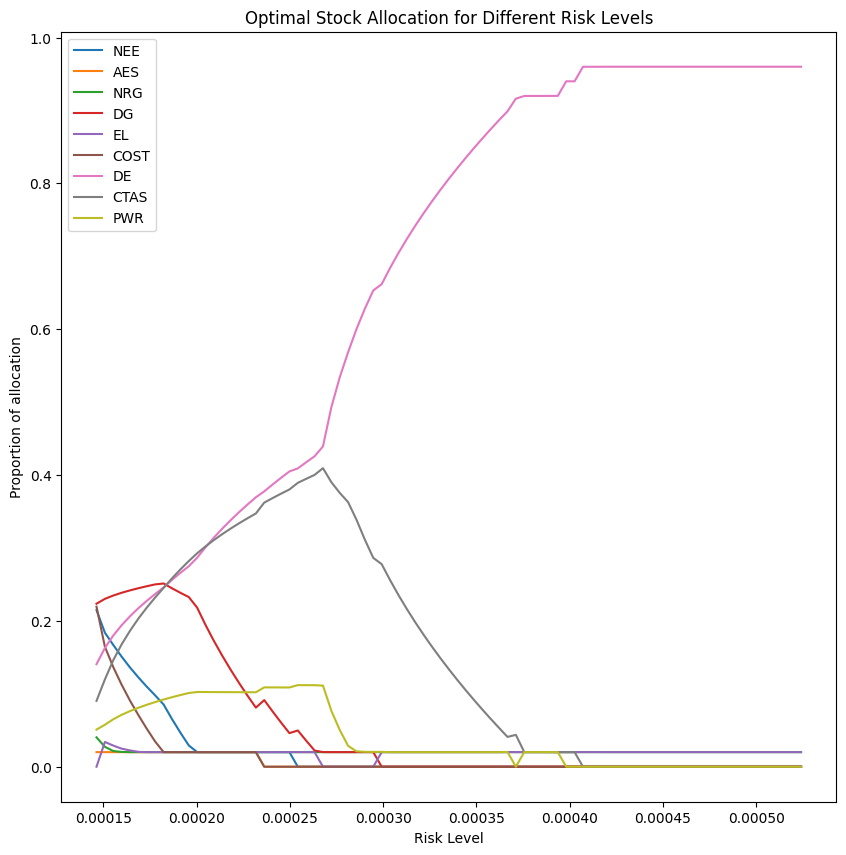

In [ ]:
# Creating a DataFrame to store portfolio allocations for each risk level
param_analysiss = pd.DataFrame.from_dict(param_analysis, orient='index')

# Renaming columns to match ticker names for better clarity
param_analysiss.columns = [final_tickers[i] for i in range(len(final_tickers))]

# Identifying the minimum risk level
least_risk = min(param_analysiss.index)

# Plotting the allocation proportions for each risk level
param_analysiss.plot(figsize=(10, 10))  # Generate a plot with defined figure size

# Adding labels and title for clarity
plt.xlabel('Risk Level')  # X-axis label
plt.ylabel('Proportion of allocation')  # Y-axis label
plt.title('Optimal Stock Allocation for Different Risk Levels')  # Plot title

# Display the plot
plt.show()

In [ ]:
# Extracting the list of risk levels from the keys of the returns dictionary
risk_list = list(returns.keys())

# Extracting the corresponding return values from the returns dictionary
return_list = list(returns.values())

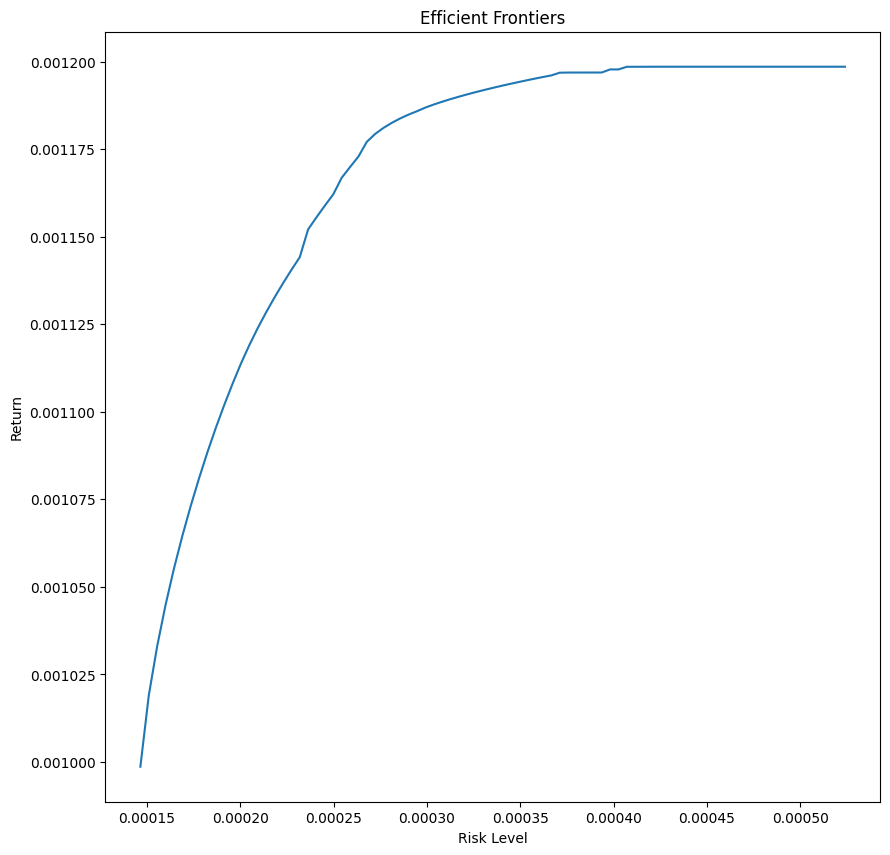

In [ ]:
from pylab import *

# Plotting risk levels against returns to visualize the efficient frontier
plt.figure(figsize=(10, 10))
plot(risk_list, return_list)  # Creating the efficient frontier curve
plt.title('Efficient Frontiers')
plt.xlabel('Risk Level')  # X-axis represents risk levels
plt.ylabel('Return')  # Y-axis represents portfolio returns
plt.show()


In [ ]:
param_analysiss.head()  # View the top rows to check allocations for different risk levels

,NEE,AES,NRG,DG,EL,COST,DE,CTAS,PWR
0.000146,0.214790,0.020012,0.040270,0.223555,3.495546e-09,0.219544,0.140613,0.090319,0.050897
0.000151,0.183832,0.020000,0.027309,0.230194,3.395419e-02,0.164570,0.162905,0.119672,0.057564
0.000155,0.166983,0.020000,0.021525,0.234783,2.899048e-02,0.136591,0.179917,0.146123,0.065086
0.000160,0.150880,0.020000,0.020275,0.238565,2.474375e-02,0.112397,0.194088,0.167877,0.071174
0.000164,0.136010,0.020000,0.020002,0.241862,2.235599e-02,0.090508,0.206410,0.186538,0.076314


In [ ]:
# Select the row where the maximum allocation of any stock is not more than 0.5
selected_row = param_analysiss[param_analysiss.max(axis=1) <= 0.5]  # Ensures no single stock exceeds 50% allocation

# Print or use the selected row
selected_allocation=selected_row.iloc[-1,:].to_dict()  # Convert the last valid row to a dictionary for allocations
print('At Risk level')
print(selected_row.index[-1])  # Display the corresponding risk level
print('Allocations:\n')
for i in selected_allocation:
  print(i,':',selected_allocation[i])  # Print allocations for each stock
print('Check: ')
a=0
for i in selected_allocation:
  a+=selected_allocation[i]  # Verify if allocations sum up to 1
print(a)

At Risk level
0.0002722716048225385
Allocations:

NEE : 3.3291468066369523e-09
AES : 3.3258409771251573e-09
NRG : 0.02000541377793147
DG : 0.020010526075850587
EL : 3.3269108021145415e-09
COST : 3.329334612985368e-09
DE : 0.4930191286963322
CTAS : 0.3901877008511961
PWR : 0.07677723059868968
Check: 
1.000000013311233


Key Insights:


*   The model built a portfolio that keeps risk in check ensuring no single stock exceeds 50% of the total investment.
* The the Industrial sector, DE (Deere & Co.) has the biggest share followed by, with CTAS (Cintas). As they had highest % gains.
* NRG and DG were selected from the Utilities and ConsumerStaples sectors, as we forced themodel to choose at least 2% per stock from other sectors as well.



#3.Investment Strategies

In [ ]:
investment = 100000  # Total investment amount
invested = {}

# Display total investment and money allocated per stock
print('Total money invested : ', investment)
print('Money invested in each Stock:\n')

# Calculate and display investment in each stock
for i in selected_allocation:
    if investment * selected_allocation[i] < 0.99:  # Skip stocks with negligible allocation
        continue
    else:
        print(i, ':', round(investment * selected_allocation[i], 2))  # Display allocation for each stock
        invested[i] = round(investment * selected_allocation[i], 2)  # Store allocation in the dictionary

# Verify the total investment
print('\nCheck: ')
b = 0
for i in invested:
    b += invested[i]  # Sum up all allocations
print(b)  # Should match the total investment


Total money invested :  100000
Money invested in each Stock:

NRG : 2000.54
DG : 2001.05
DE : 49301.91
CTAS : 39018.77
PWR : 7677.72

Check: 
99999.98999999999


In [ ]:
# Extract the tickers from the invested dictionary
invested_tickers = list(invested.keys())
data = {}

# Download stock data for each invested ticker
for ticker in invested_tickers:
    try:
        # Fetch daily stock data for the year 2023
        data[ticker] = yf.download(ticker, start='2023-01-01', end='2023-12-31', interval='1d')

        # Optional: Add any further processing logic here
        print(f"Downloaded data for {ticker}")  # Confirm successful data download
    except Exception as e:
        # Handle and display errors during the data download
        print(f"Error downloading data for {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed

Downloaded data for NRG



[*********************100%***********************]  1 of 1 completed


Downloaded data for DG


[*********************100%***********************]  1 of 1 completed


Downloaded data for DE

[*********************100%***********************]  1 of 1 completed



Downloaded data for CTAS


[*********************100%***********************]  1 of 1 completed

Downloaded data for PWR


In [ ]:
# Initialize an empty dictionary to store adjusted close prices for each ticker
x = {}

# Extract the adjusted close prices (first column) for each invested ticker
for i in invested_tickers:
    x[i] = data[i].iloc[:, 0]

# Create a DataFrame with adjusted close prices for all tickers
f_df = pd.DataFrame(x)

# Calculate daily percentage change for the DataFrame and remove NaN values
p_df = f_df.pct_change().dropna()

# Reset the index for the resulting DataFrame to make it easier to work with
p_df.reset_index(inplace=True)

# Display the first few rows of the processed DataFrame
p_df.head()

,Date,NRG,DG,DE,CTAS,PWR
0,2023-01-04,0.005011,-0.013051,-0.001909,-0.011493,-0.014651
1,2023-01-05,-0.010595,0.007885,-0.020662,-0.023207,-0.021509
2,2023-01-06,0.014173,0.012794,0.028308,0.019399,0.026186
3,2023-01-09,0.013665,-0.030214,0.004057,-0.001426,-0.003450
4,2023-01-10,0.006740,0.002945,0.021555,0.008293,0.006275


In [ ]:
# Calculate the mean daily percentage return for each ticker, excluding the index column
average_daily_returns = p_df.iloc[:, 1:].mean()

# Display the average daily returns
average_daily_returns

,0
NRG,0.002252
DG,-0.002088
DE,-0.000038
CTAS,0.001356
PWR,0.001879


##  3.1.  Buy and hold strategy

In [ ]:
# Check which stocks in `invested` are present in `p_df`
valid_tickers = [ticker for ticker in invested.keys() if ticker in p_df.columns]

# Warn about missing tickers
missing_tickers = [ticker for ticker in invested.keys() if ticker not in p_df.columns]
if missing_tickers:
    print(f"Warning: The following tickers are missing in p_df and will be skipped: {missing_tickers}")

# Initialize the portfolio value dictionary
portfolio_value = {}

# Initialize the first stock with its investment amount
for stock in valid_tickers:
    portfolio_value[stock] = invested[stock]  # Set initial portfolio value for each stock

# Calculate cumulative returns for each valid ticker based on initial investment and daily percentage change
for stock in valid_tickers:
    # Get the initial value for the first stock or use the last portfolio value for subsequent stocks
    initial_investment = portfolio_value[stock]

    # Calculate the cumulative return for the current stock
    p_df[f'{stock}_return'] = initial_investment * (1 + p_df[stock]).cumprod()

    # After processing the stock, update the portfolio value for the next iteration
    portfolio_value[stock] = p_df[f'{stock}_return'].iloc[-1]  # Store the last value of the cumulative return

# Optionally, drop the original percentage change columns
p_df.drop(columns=valid_tickers, inplace=True)

# Display the resulting DataFrame
p_df.head()


,Date,NRG_return,DG_return,DE_return,CTAS_return,PWR_return
0,2023-01-04,2010.564603,1974.933974,49207.781966,38570.345560,7565.236783
1,2023-01-05,1989.262003,1990.506348,48191.045838,37675.237646,7402.519389
2,2023-01-06,2017.456485,2015.973717,49555.220928,38406.098741,7596.359632
3,2023-01-09,2045.024269,1955.063015,49756.243754,38351.350721,7570.151005
4,2023-01-10,2058.807907,1960.821493,50828.756765,38669.415113,7617.654873


In [ ]:
# Group by month and sum the return columns.

p_df['Date'] = pd.to_datetime(p_df['Date'])
p_df['Month'] = p_df['Date'].dt.to_period('M')

# Select only the return columns (excluding 'Date' and 'Month')
return_cols = [col for col in p_df.columns if '_return' in col]

# Group by month and sum the specified return columns
monthly_returns = p_df.groupby('Month')[return_cols].last().round(2)

# Reset index to make 'Month' a regular column
monthly_returns.reset_index(inplace=True)
monthly_returns['Total Return'] = monthly_returns[return_cols].sum(axis=1)
# Print the resulting dataframe
monthly_returns.head(12)

,Month,NRG_return,DG_return,DE_return,CTAS_return,PWR_return,Total Return
0,2023-01,2168.45,1894.64,49133.42,38562.52,8310.02,100069.05
1,2023-02,2077.83,1754.33,48715.10,38499.86,8812.91,99860.03
2,2023-03,2172.88,1706.96,48126.18,40625.62,9099.03,101730.67
3,2023-04,2189.57,1801.18,44062.82,40018.89,9267.48,97339.94
4,2023-05,2165.22,1635.51,40328.17,41862.32,9701.24,95692.46
5,2023-06,2395.91,1380.85,47375.96,44073.63,10736.52,105962.87
6,2023-07,2459.00,1378.17,50230.05,44513.40,11019.08,109599.70
7,2023-08,2430.52,1130.39,48048.27,44825.76,11469.96,107904.90
8,2023-09,2493.31,863.50,44279.86,42766.60,10228.21,100631.48
9,2023-10,2767.92,976.98,42869.50,45088.04,9137.43,100839.87


##  3.2.  Weekly rebalance

In [ ]:
# Initialize an empty dictionary to store adjusted close prices for each ticker
x = {}

# Extract the adjusted close prices (first column) for each invested ticker
for i in invested_tickers:
    x[i] = data[i].iloc[:, 0]

# Create a DataFrame with adjusted close prices for all tickers
f_df = pd.DataFrame(x)

# Calculate daily percentage change for the DataFrame and remove NaN values
p2_df = f_df.pct_change().dropna()

# Reset the index for the resulting DataFrame to make it easier to work with
p2_df.reset_index(inplace=True)

# Display the first few rows of the processed DataFrame
p2_df.head()

,Date,NRG,DG,DE,CTAS,PWR
0,2023-01-04,0.005011,-0.013051,-0.001909,-0.011493,-0.014651
1,2023-01-05,-0.010595,0.007885,-0.020662,-0.023207,-0.021509
2,2023-01-06,0.014173,0.012794,0.028308,0.019399,0.026186
3,2023-01-09,0.013665,-0.030214,0.004057,-0.001426,-0.003450
4,2023-01-10,0.006740,0.002945,0.021555,0.008293,0.006275


In [ ]:
weekly_df = p2_df.copy()

In [ ]:
# Create a 'Week' column based on the 'Date' column
weekly_df['Week'] = weekly_df['Date'].dt.to_period('W')

# Select only numeric columns (exclude 'Date' and any non-numeric columns)
numeric_columns = weekly_df.select_dtypes(include=['number']).columns

# Group by 'Week' and apply cumulative product (1 + value).cumprod() only to numeric columns
weekly_df_grouped = weekly_df.groupby('Week')[numeric_columns].apply(lambda x: (1 + x).cumprod())

# Now take the last row of each group after the cumulative product
weekly_df_grouped = weekly_df_grouped.groupby('Week').last()

# Display the resulting DataFrame
weekly_df_grouped.head()


,NRG,DG,DE,CTAS,PWR
Week,,,,,
2023-01-02/2023-01-08,1.008456,1.007458,1.005138,0.984298,0.989403
2023-01-09/2023-01-15,0.990062,0.939492,1.030858,1.015794,1.067424
2023-01-16/2023-01-22,1.010351,0.987538,0.933967,0.972445,0.984781
2023-01-23/2023-01-29,1.047811,1.023850,1.018461,1.001649,1.025711
2023-01-30/2023-02-05,1.031773,0.966033,0.971017,1.011778,1.016200


In [ ]:
#creating a dictionary for rebalancing ratio
b=0
for i in invested:
  b+=invested[i]
ratio_invested={}
for i in invested:
  ratio_invested[i]=invested[i]/b

current_investments = invested.copy()

# List to store results for all weeks
all_weekly_values = []

# Iterate over each week in the DataFrame
for week, week_data in weekly_df_grouped.iterrows():
    # Calculate values at the end of the week
    week_end_values = {
        stock: current_investments[stock] * (week_data[stock]) for stock in current_investments
    }

    # Calculate total portfolio value at the end of the week
    total=0
    for i in week_end_values:
      total+=week_end_values[i]
    week_end_values['Total Portfolio'] = total

    # Append the results for this week
    all_weekly_values.append({'Week': week, **week_end_values})
################################
    # Rebalance the investments for the next week
    current_investments = {
        stock: total * ratio_invested[stock] for stock in current_investments
    }
###############################
# Create a DataFrame to store results for all weeks
all_weekly_df = pd.DataFrame(all_weekly_values)

# Display the resulting DataFrame
all_weekly_df.head()


,Week,NRG,DG,DE,CTAS,PWR,Total Portfolio
0,2023-01-02/2023-01-08,2017.456485,2015.973717,49555.220928,38406.098741,7596.359632,99591.109503
1,2023-01-09/2023-01-15,1972.560254,1872.282709,50615.459520,39472.971356,8161.872372,102095.146210
2,2023-01-16/2023-01-22,2063.596515,2017.516429,47011.111717,38738.581534,7719.285879,97550.092075
3,2023-01-23/2023-01-29,2044.834011,1998.581814,48981.911316,38125.629022,7682.190600,98833.146763
4,2023-01-30/2023-02-05,2040.017583,1910.523769,47314.399829,39017.670896,7711.061289,97993.673365


In [ ]:
all_weekly_df.tail()

,Week,NRG,DG,DE,CTAS,PWR,Total Portfolio
47,2023-11-27/2023-12-03,2227.607990,2269.093197,51888.993365,41468.768439,8464.894806,106319.357797
48,2023-12-04/2023-12-10,2102.337013,2009.510680,51686.956750,41118.896017,8535.599908,105453.300369
49,2023-12-11/2023-12-17,2151.554591,2155.953027,55192.813813,41546.654032,8737.214648,109784.190111
50,2023-12-18/2023-12-24,2252.129570,2234.527102,55632.821443,45637.207153,8390.506046,114147.191314
51,2023-12-25/2023-12-31,2361.201734,2348.757013,56917.615075,45094.028832,8839.642236,115561.244890


##  3.3. Montly rebalance

In [ ]:
Monthly_df = p2_df.copy()


# Create a 'Month' column based on the 'Date' column
Monthly_df['Month'] = Monthly_df['Date'].dt.to_period('M')

# Select only numeric columns (exclude 'Date' and any non-numeric columns)
numeric_columns = Monthly_df.select_dtypes(include=['number']).columns

# Group by 'Month' and apply cumulative product (1 + value).cumprod() only to numeric columns
Monthly_df_grouped = Monthly_df.groupby('Month')[numeric_columns].apply(lambda x: (1 + x).cumprod())

# Now take the last row of each group after the cumulative product
Monthly_df_grouped = Monthly_df_grouped.groupby('Month').last()

# Display the resulting DataFrame
Monthly_df_grouped.head()


#creating a dictionary for rebalancing ratio
b=0
for i in invested:
  b+=invested[i]
ratio_invested={}
for i in invested:
  ratio_invested[i]=invested[i]/b

current_investments = invested.copy()

# List to store results for all weeks
all_Monthly_values = []

# Iterate over each Month in the DataFrame
for Month, Month_data in Monthly_df_grouped.iterrows():
    # Calculate values at the end of the Month
    Month_end_values = {
        stock: current_investments[stock] * (Month_data[stock]) for stock in current_investments
    }

    # Calculate total portfolio value at the end of the Month
    total=0
    for i in Month_end_values:
      total+=Month_end_values[i]
    Month_end_values['Total Portfolio'] = total

    # Append the results for this Month
    all_Monthly_values.append({'Month': Month, **Month_end_values})

    # Rebalance the investments for the next Month
    current_investments = {
        stock: total * ratio_invested[stock] for stock in current_investments
    }

# Create a DataFrame to store results for all weeks
all_Monthly_df = pd.DataFrame(all_Monthly_values)

# Display the resulting DataFrame
all_Monthly_df.head()


,Month,NRG,DG,DE,CTAS,PWR,Total Portfolio
0,2023-01,2168.448650,1894.638902,49133.420056,38562.523626,8310.021302,100069.052536
1,2023-02,1918.264426,1854.135582,48915.919035,38982.268407,8147.971073,99818.558522
2,2023-03,2088.260484,1943.489849,48617.520140,41098.484804,7912.602916,101660.358194
3,2023-04,2049.376565,2146.560837,45888.758218,39074.211270,7949.690306,97108.597196
4,2023-05,1921.091870,1764.455914,43818.519621,39635.980843,7804.692051,94944.740300


In [ ]:
all_Monthly_df.tail()

,Month,NRG,DG,DE,CTAS,PWR,Total Portfolio
7,2023-08,2166.902838,1798.591089,51680.826134,43058.808013,8757.912779,107463.040853
8,2023-09,2205.376422,1642.680343,48826.031664,40004.592974,7357.481571,100036.162974
9,2023-10,2221.682507,2264.840560,47748.852732,41151.651579,6861.413197,100248.440574
10,2023-11,2263.888979,2209.589466,49295.890694,42781.557953,8672.711045,105223.638137
11,2023-12,2274.887793,2183.140067,57134.449027,44723.707857,9261.990195,115578.174939


## 3.4. Daily Rebalancing

In [ ]:
Daily_df = p2_df.copy()

# Create a 'Date' column in the daily DataFrame (already exists as 'Date')
Daily_df['Date'] = Daily_df['Date'].dt.to_period('D')

# Select only numeric columns (exclude 'Date' and any non-numeric columns)
numeric_columns = Daily_df.select_dtypes(include=['number']).columns

# Group by 'Date' and apply cumulative product (1 + value).cumprod() only to numeric columns
Daily_df_grouped = Daily_df.groupby('Date')[numeric_columns].apply(lambda x: (1 + x).cumprod())

# Now take the last row of each group after the cumulative product
Daily_df_grouped = Daily_df_grouped.groupby('Date').last()

# Display the resulting DataFrame
Daily_df_grouped.head()

# Creating a dictionary for rebalancing ratio
b = 0
for i in invested:
    b += invested[i]
ratio_invested = {}
for i in invested:
    ratio_invested[i] = invested[i] / b

current_investments = invested.copy()

# List to store results for all days
all_Daily_values = []

# Iterate over each day in the DataFrame
for day, day_data in Daily_df_grouped.iterrows():
    # Calculate values at the end of the day
    day_end_values = {
        stock: current_investments[stock] * (day_data[stock]) for stock in current_investments
    }

    # Calculate total portfolio value at the end of the day
    total = 0
    for i in day_end_values:
        total += day_end_values[i]
    day_end_values['Total Portfolio'] = total

    # Append the results for this day
    all_Daily_values.append({'Date': day, **day_end_values})

    # Rebalance the investments for the next day
    current_investments = {
        stock: total * ratio_invested[stock] for stock in current_investments
    }

# Create a DataFrame to store results for all days
all_Daily_df = pd.DataFrame(all_Daily_values)

# Display the resulting DataFrame
all_Daily_df.head()


,Date,NRG,DG,DE,CTAS,PWR,Total Portfolio
0,2023-01-04,2010.564603,1974.933974,49207.781966,38570.345560,7565.236783,99328.862885
1,2023-01-05,1966.059702,2003.292817,47959.187115,37857.467014,7462.164265,97248.170913
2,2023-01-06,1973.062821,1970.882459,49302.426565,38681.138994,7661.957143,99589.467982
3,2023-01-09,2019.551746,1932.623653,49298.689018,38803.196295,7619.820677,99673.881390
4,2023-01-10,2007.455904,2000.399112,50200.386280,39214.070722,7700.704056,101123.016074


In [ ]:
all_Daily_df.tail()

,Date,NRG,DG,DE,CTAS,PWR,Total Portfolio
244,2023-12-22,2262.376968,2303.971848,56349.229893,44601.478344,8763.331660,114280.388714
245,2023-12-26,2323.262263,2301.509981,56974.247073,45129.429041,8799.545450,115527.993809
246,2023-12-27,2329.833368,2335.749202,57010.040476,45360.447825,8923.221213,115959.292084
247,2023-12-28,2348.798485,2339.561984,57040.144317,44863.753477,8924.468478,115516.726741
248,2023-12-29,2303.828917,2318.368964,57038.965362,45190.927568,8845.278470,115697.369281


##  3.5. Comparing Investment Strategies

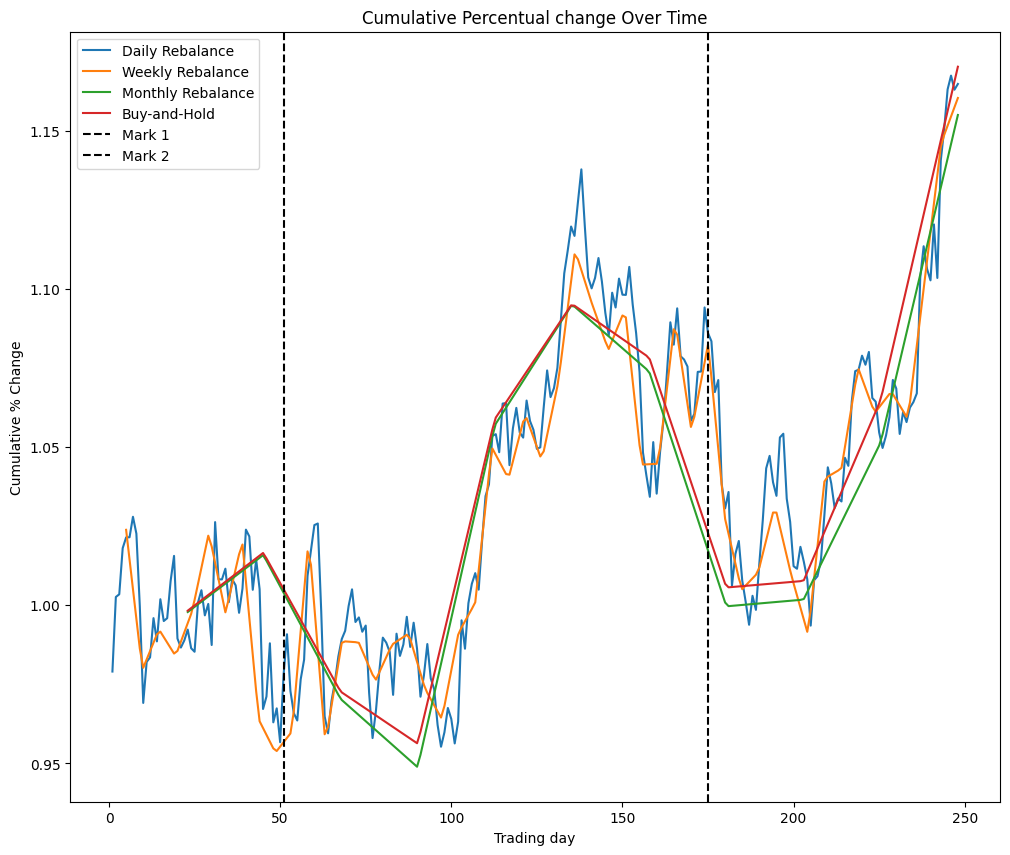

In [ ]:
l1=(all_Daily_df['Total Portfolio'].pct_change()+1).cumprod().to_list()
l2=(all_weekly_df['Total Portfolio'].pct_change()+1).cumprod().to_list()
l3=(all_Monthly_df['Total Portfolio'].pct_change()+1).cumprod().to_list()
l4=(monthly_returns['Total Return'].pct_change()+1).cumprod().to_list()

from scipy.interpolate import interp1d
import numpy as np

# Reference length: the longest list (daily rebalancing in this case)
max_length = len(l1)

# Create a common x-axis scale (e.g., 0 to max_length - 1)
common_x = np.linspace(0, max_length - 1, max_length)

# Interpolation function to resize lists
def interpolate_list(values, target_length):
    original_x = np.linspace(0, target_length - 1, len(values))
    interpolator = interp1d(original_x, values, kind='linear', fill_value='extrapolate')
    return interpolator(np.linspace(0, target_length - 1, target_length))

# Interpolate all lists to the common x-axis scale
l1_interp = l1  # Daily rebalancing already matches the length
l2_interp = interpolate_list(l2, max_length)
l3_interp = interpolate_list(l3, max_length)
l4_interp = interpolate_list(l4, max_length)

# Plot the graphs
plt.figure(figsize=(12, 10))
plt.plot(common_x, l1_interp, label='Daily Rebalance')
plt.plot(common_x, l2_interp, label='Weekly Rebalance')
plt.plot(common_x, l3_interp, label='Monthly Rebalance')
plt.plot(common_x, l4_interp, label='Buy-and-Hold')
#Lines to just draw attention to certain points in graph
plt.axvline(x=51,color='black',linestyle='--',label='Mark 1')
plt.axvline(x=175,color='black',linestyle='--',label='Mark 2')
#Annotating the plot
plt.title('Cumulative Percentual change Over Time')
plt.xlabel('Trading day')
plt.ylabel('Cumulative % Change')
plt.legend()
plt.show()


In [ ]:
last_values = {}

# Extract the last value of the 'Total Portfolio' column from each dataframe
last_values['Daily Rebalance'] = all_Daily_df['Total Portfolio'].iloc[-1].round(2)
last_values['Weekly Rebalance'] = all_weekly_df['Total Portfolio'].iloc[-1].round()
last_values['Monthly Rebalance'] = all_Monthly_df['Total Portfolio'].iloc[-1].round(2)
last_values['Buy and Hold Strategy'] = monthly_returns['Total Return'].iloc[-1].round(2)

#extracting last value on from cummulative % changes
c1={}
c1['Daily Rebalance']=l1[-1]
c1['Weekly Rebalance']=l2[-1]
c1['Monthly Rebalance']=l3[-1]
c1['Buy and Hold Strategy']=l4[-1]

#Creating a table for easy comparision
summary_table = pd.DataFrame({
    'Final Portfolio $ value': last_values,
    'Final % Change': c1
})

# Display the summary table
summary_table

,Final Portfolio $ value,Final % Change
Daily Rebalance,115697.37,1.164791
Weekly Rebalance,115561.00,1.160357
Monthly Rebalance,115578.17,1.154984
Buy and Hold Strategy,117105.16,1.170244


##**Key insights on Strategies:**
For the give stocks and allocations,
1. **Performance Comparison Across Rebalancing Strategies**:
   - The **Buy-and-Hold strategy** (red line) shows steady growth over time and outperforms the other strategies towards the end of the time period.

   - **Daily Rebalance** (blue line) shows the  frequent fluctuations and aligns in general with the **Buy-and-Hold strategy** at various points. However, ocassionally outperforms the Buy-and-Hold and Monthly rebalancing strategies.
    
   - **Weekly Rebalance** (orange line), aligns closely with Daily Rebalancing,  exhibits smoother fluctuations than daily but lags slightly behind in cumulative value.

   - **Monthly Rebalance** (green line) appears more conservative with fewer fluctuations but underperforms the Buy-and-Hold strategy overall.

2. **Differences in Strategies**:
   - At the *Mark 1 location* , we see that the long term strategies like Month;y rebalancing and Buy-and-Hold, perfomr better than the short term strategies. This may be attributed to, **Chasing Market Noise**, as  Short-term rebalancing tends to react to transient market fluctuations rather than focusing on underlying long-term trends, leading to suboptimal adjustments.

   - The *Mark 2 location*, short term strategies outperfrom the long ones. This may be attributed to the bearish market and when prices of certain stocks in portfolio fall sharply, rebalancing frequently may be profitable.


3. **Trade-offs Between Volatility and Growth**:
   - Higher rebalancing frequencies (e.g., Daily Rebalance) could lead to better alignment with short-term market movements but introduce higher volatility.
   - Lower frequencies (e.g., Monthly Rebalance) prioritize stability but may miss out on rapid market gains.

4. **Optimal Strategy Selection**:
   - Depending on the risk tolerance and investment goals, investors might choose between rebalancing strategies or Buy-and-Hold:
     - **High growth focus**: Buy-and-Hold.
     - **Risk management**: Monthly or Weekly Rebalancing.
     - **Active management**: Daily Rebalancing.



#4.Monte Carlo Analysis

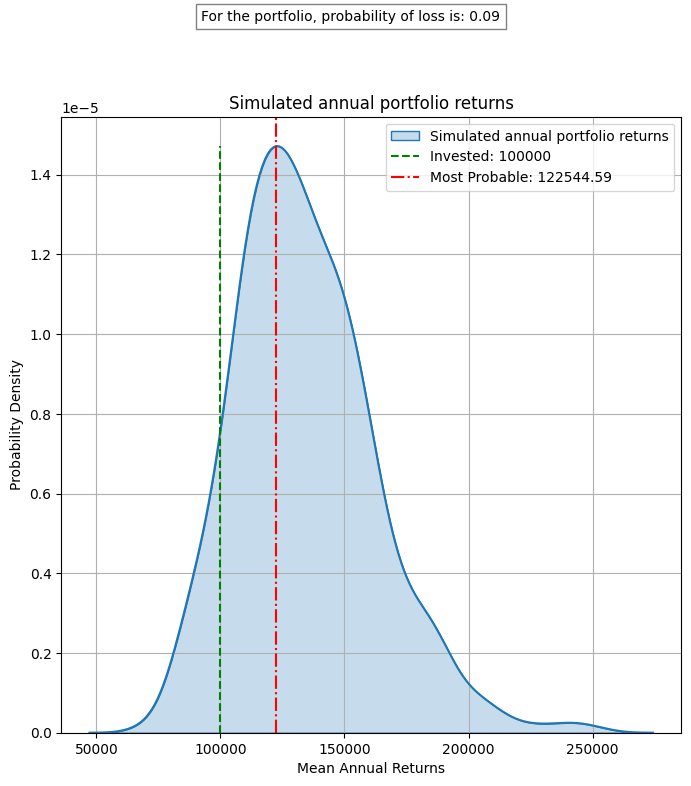

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#setting random seed to ensure results from Simualtions match the interpretations on a later date.
np.random.seed(99)
n_sims = 1000 # Number of simulations
portfolio_return = []  # List to store portfolio returns from simulations
prob_loss_dict2 = {}
mostprob_return_dict2 = {}

weights=selected_allocation # Portfolio allocation weights

# Total invested amount (e.g., $100,000)
invested_amount = 100000

# Simulate portfolio returns
for i in range(n_sims):
    portfolio_sim_return = 0  # Initialize portfolio return for this simulation

    # Calculate the weighted sum of individual stock returns
    for ticker in invested_tickers:
        mean = summary_df.loc[ticker, 'Mean Return']
        std = summary_df.loc[ticker, 'Standard Deviation']

        # Simulate stock returns for the day (252 trading days)
        stock_returns = np.random.normal(loc=mean, scale=std, size=252)  # 252 trading days

        # Calculate the stock's total return for the year (in terms of invested money)
        stock_annual_return = invested_amount * weights[ticker] * np.prod(1 + stock_returns)

        # Add the weighted stock return to the portfolio return
        portfolio_sim_return += stock_annual_return

    # Store the portfolio return for this simulation
    portfolio_return.append(portfolio_sim_return)

# Convert the portfolio returns to a numpy array
portfolio_return = np.array(portfolio_return)

# Total invested value in the portfolio (this is the same in all simulations, $100,000)
portfolio_invested = invested_amount

# Probability of losing money in the portfolio (return less than the total invested amount)
prob_loss = np.mean(portfolio_return < portfolio_invested)
prob_loss_dict2['Portfolio'] = prob_loss

plt.figure(figsize=(8, 8))
# Create KDE plot for the portfolio
sns.kdeplot(portfolio_return, label='Simulated annual portfolio returns', fill=True)

# Highlight probability of losing money on the KDE plot
density = sns.kdeplot(portfolio_return, label=None).get_lines()[0].get_data()
x_values, y_values = density  # Extract KDE plot data points

# Most probable return (mode of the distribution)
most_probable_return = x_values[np.argmax(y_values)]
mostprob_return_dict2['Portfolio'] = most_probable_return

# Annotate the plot
plt.title('Simulated annual portfolio returns')
plt.xlabel('Mean Annual Returns')
plt.ylabel('Probability Density')

# Display probability of loss and most probable return
plt.figtext(
    0.3, 1,
    f'For the portfolio, probability of loss is: {prob_loss:.2f}',
    fontsize=10, bbox=dict(facecolor='white', alpha=0.5)
)

# Plot the invested value and most probable return
plt.plot(
    [portfolio_invested, portfolio_invested],  # Vertical line for invested amount
    [0, max(y_values)],  # y-values spanning the KDE range
    color='green', linestyle='--', label=f'Invested: {portfolio_invested}'
)

plt.axvline(
    most_probable_return, color='red', linestyle='-.', label=f'Most Probable: {most_probable_return:.2f}'
)

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### **Key Insights for the Portfolio:**

NOTE: We were not able to Monte Carlo Simulation with Random seed. Hence, there is a slight variation in result everytime we run the code.

1. **Most Probable Return**: Based on the Monte Carlo simulations, the portfolio's most probable return is approximately 122,000. Which is about 22% gains.

2. **Probability of Loss**: The probability of loss is 8% (+/- 1%) which is remarkably low, making this portfolio a safe investment option.

3. **Return Distribution**: The distribution shows a slight right skew, suggesting that the portfolio has some potential for higher-than-expected gains under favorable conditions.

4. **Risk-Reward Balance**: With a low probability of loss and a significant margin between the invested amount and the most probable return, the portfolio provides an excellent balance of low risk and substantial growth potential.

5. **Investor Suitability**: This portfolio is highly suitable for risk-averse investors seeking consistent growth with minimal chances of loss.


#5.Conclusion

*Insights:*

*   **Dynamic Trade-offs Between Risk and Return:** The project reinforced the importance of balancing risk and return, demonstrating how Modern Portfolio Theory (MPT) enables us to create a portfolio tailored to specific risk tolerance levels. Adjusting risk levels showed the distinct impact on portfolio composition and returns.

*   **Diversification Benefits:** Cross-sector diversification (Utilities, Industrials, and Consumer Staples) proved vital in minimizing risk while maintaining acceptable returns. This highlighted how sectoral performance can stabilize overall portfolio volatility.

*   **Impact of Risk Constraints:** Enforcing a maximum allocation of 50% per stock and a minimum allocation of 2% ensures that portfolios avoid over-concentration and maintain exposure to multiple sectors, reducing portfolio-specific risks.

*   **Value of Optimization Models:** The use of optimization tools like BonMin illustrated how advanced computational methods can identify optimal allocations, even with complex constraints, while exposing the challenges of infeasible solutions at extreme risk thresholds.

*   **Monte Carlo Simulations for Realistic Projections:** Monte Carlo simulations provided a probabilistic evaluation of portfolio returns and the likelihood of losses. This added a layer of realism to the analysis, helping us assess how the portfolio might behave under uncertain conditions.

*   **Periodic Rebalancing Strategies:** Comparing buy-and-hold and rebalancing strategies demonstrated the advantages of rebalancing in maintaining portfolio alignment with original allocation goals. However, frequent rebalancing incurs additional transaction costs, which need to be considered in real-world applications.

*   **Efficient Frontier Observations:** The efficient frontier showed diminishing returns beyond a certain risk level, aligning with MPT principles. This insight highlights the need to identify the plateau point to avoid taking on unnecessary risk for negligible gains.

*   **Sector-Specific Insights:** Industrial stocks like Deere & Co. provided high returns but also introduced more volatility, whereas Utilities (e.g., NextEra Energy) delivered steady returns with lower risk, underscoring the role of sectoral trends in portfolio design.

*   **Data Challenges and Importance of Validation:** Ensuring data quality and handling missing or insufficient data from delisted stocks (e.g., BF.B) emphasized the importance of pre-analysis data cleaning to avoid computational errors during optimization.

*  **Real-World Relevance:** This project demonstrated how financial modeling tools can be directly applied in real-world investment scenarios, teaching us practical skills like portfolio optimization, risk management, and performance simulation.